In [1]:
#import package 
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pandas as pd 
import cv2
from scipy.ndimage import rotate


 tous les package exist 


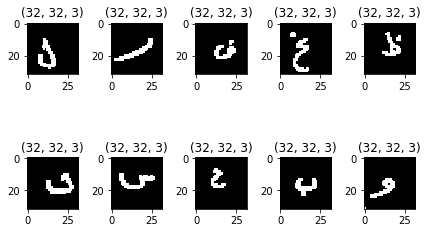

In [2]:
#test des données
DATADIR = "C:/Users/hp/Desktop/ml1/archive_2/Train Images 13440x32x32/train"
path = os.listdir(DATADIR) 

width=50
height=50
rows = 2
cols = 5
axes=[]
fig=plt.figure()

for a in range(rows*cols):
    img = np.random.randint(0,len(path))
    axes.append( fig.add_subplot(rows, cols, a+1) )
    img_array = cv2.imread(os.path.join(DATADIR,path[img]))
    subplot_title=(img_array.shape)
    axes[-1].set_title(subplot_title)  
    plt.imshow(img_array)
fig.tight_layout()
plt.show()

In [3]:
#load labels
DATADIR = "C:/Users/hp/Desktop/ml1/archive_2/"
df1 = pd.read_csv(os.path.join(DATADIR, 'csvTrainLabel 13440x1.csv'), header = None )

df2 = pd.read_csv(os.path.join(DATADIR, 'csvTestLabel 3360x1.csv'), header = None)

train_label = df1.values.astype('int32')-1
test_label = df2.values.astype('int32')-1

print('train label shape :', train_label.shape)
print('test label shape :', test_label.shape)


train label shape : (13440, 1)
test label shape : (3360, 1)


In [4]:
#load data
X_train=pd.read_csv("C:/Users/hp/Desktop/ml1/archive_2/csvTrainImages.csv", header = None)
X_test=pd.read_csv("C:/Users/hp/Desktop/ml1/archive_2/csvTestImages 3360x1024.csv", header = None)
print('train label shape :', X_train.shape)
print('test label shape :', X_test.shape)

train label shape : (13440, 1024)
test label shape : (3360, 1024)


In [6]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x_train=X_train.values
x_test=X_test.values


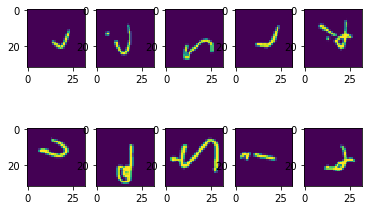

In [10]:
#image avant la rotation
axes2=[]
fig2=plt.figure()

for a in range(rows*cols):
    img = np.random.randint(0,len(path))
    axes2.append( fig2.add_subplot(rows, cols, a+1) )
    img_array = x_train[img].reshape([32,32])
    subplot_title=(img_array.shape)
    axes[-1].set_title(subplot_title)  
    plt.imshow(img_array)
fig.tight_layout()
plt.show()

In [11]:
#fonction pour rotationner les images
def rotation_data(nparray):
    i = 0
    for img_arr in nparray:
        
        img_arr = img_arr.reshape([ 32, 32])
        img_arr = np.flip(img_arr, 0)
        img_arr = rotate(img_arr, -90)
        img_arr = img_arr.reshape([1024])
        nparray[i] = img_arr
        i = i+1
    return nparray

In [12]:
x_train=rotation_data(x_train)
x_test=rotation_data(x_test)

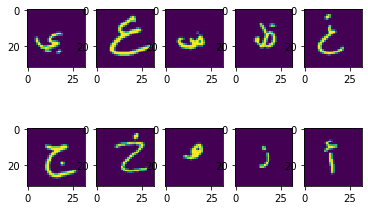

In [14]:
#image apres la rotation
axes3=[]
fig3=plt.figure()

for a in range(rows*cols):
    img = np.random.randint(0,len(path))
    axes3.append( fig3.add_subplot(rows, cols, a+1) )
    img_array = x_train[img].reshape([32,32])
    subplot_title=(img_array.shape)
    axes[-1].set_title(subplot_title)  
    plt.imshow(img_array)
fig.tight_layout()
plt.show()

In [15]:
#redimentionner data 
x_train_reshaped=x_train.reshape([-1,32,32,1])
x_test_reshaped=x_test.reshape([-1,32,32,1])

In [17]:
#normalisé les données
x_mean=x_train_reshaped.mean()
x_std=x_train_reshaped.std()
x_test_norm=(x_test_reshaped-x_mean)/x_std
x_train_norm=(x_train_reshaped-x_mean)/x_std

In [18]:
x_train_norm[0].shape

(32, 32, 1)

In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [20]:
#build model 
model=  tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),input_shape=[32,32,1],activation="relu",kernel_regularizer=regularizers.l2(0.001)),#for regularization
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(29,activation="softmax")
])

In [21]:
model.compile(metrics=["accuracy"], loss="sparse_categorical_crossentropy",optimizer="adam" )

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [23]:
history = model.fit(x_train_norm[:10000], 
                    train_label[:10000] ,
                    validation_data=(x_train_norm[10000:], train_label[10000:]),
                    epochs=18)

Epoch 1/18
313/313 [==============================] - 20s 62ms/step - loss: 3.1528 - accuracy: 0.1370 - val_loss: 1.5001 - val_accuracy: 0.5558
Epoch 2/18
313/313 [==============================] - 17s 56ms/step - loss: 1.5901 - accuracy: 0.5028 - val_loss: 1.0004 - val_accuracy: 0.7294
Epoch 3/18
313/313 [==============================] - 17s 55ms/step - loss: 1.1388 - accuracy: 0.6740 - val_loss: 0.8054 - val_accuracy: 0.8067
Epoch 4/18
313/313 [==============================] - 19s 60ms/step - loss: 0.9364 - accuracy: 0.7487 - val_loss: 0.7370 - val_accuracy: 0.8343
Epoch 5/18
313/313 [==============================] - 18s 56ms/step - loss: 0.7882 - accuracy: 0.8043 - val_loss: 0.6506 - val_accuracy: 0.8637
Epoch 6/18
313/313 [==============================] - 17s 55ms/step - loss: 0.7020 - accuracy: 0.8385 - val_loss: 0.6327 - val_accuracy: 0.8698
Epoch 7/18
313/313 [==============================] - 19s 62ms/step - loss: 0.6424 - accuracy: 0.8659 - val_loss: 0.6074 - val_accuracy:

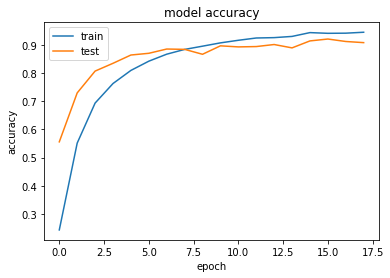

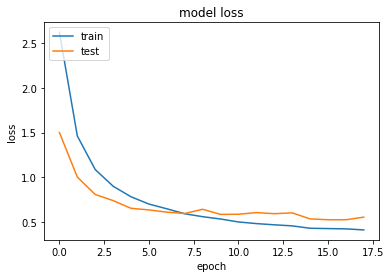

In [24]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
score = model.evaluate(x_test_norm, test_label)
print('Test accuarcy: %0.2f%%' % (score[1] * 100))

105/105 [==============================] - 2s 20ms/step - loss: 0.4704 - accuracy: 0.9289
Test accuarcy: 92.89%


In [26]:
model.save("arabic_recognition1.model")

INFO:tensorflow:Assets written to: arabic_recognition1.model\assets


In [27]:
new_model = tf.keras.models.load_model('arabic_recognition2.model')

In [28]:
score = new_model.evaluate(x_test_norm, test_label)
print('Test accuarcy: %0.2f%%' % (score[1] * 100))

105/105 [==============================] - 2s 18ms/step - loss: 0.4542 - accuracy: 0.9333
Test accuarcy: 93.33%


In [29]:
lettre = []
for i in range(0,36):
    #print(chr(1575+i), i)
    lettre.append(chr(1575+i))
p = [2, 21, 22, 23, 24, 25, 34]
lettre.remove('ة')
lettre.remove('ؼ')
lettre.remove('ؽ')
lettre.remove('ؾ')
lettre.remove('ؿ')
lettre.remove('ـ')
lettre.remove('ى')
lettre.remove('ػ')


In [31]:
predict = new_model.predict(x_test_norm)
predict = list(map(np.argmax, predict))

unique, counts = np.unique(predict, return_counts=True)
unique2, counts2 = np.unique(test_label, return_counts=True)

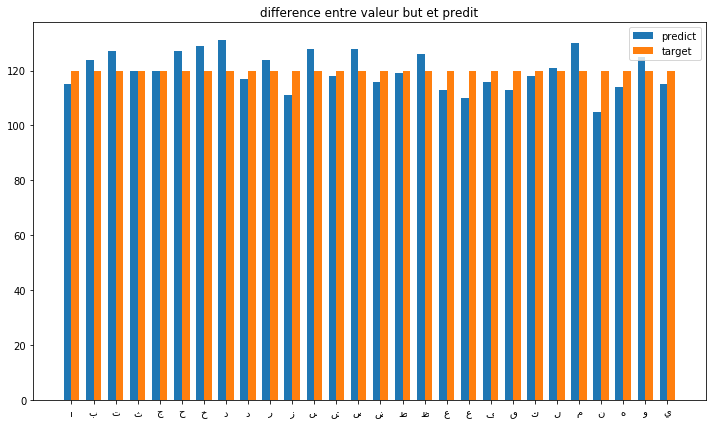

In [33]:

x = np.arange(len(lettre))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(unique - width/2, counts, width, label='predict')
rects2 = ax.bar(unique2 + width/2, counts2, width, label='target')

ax.set_title('difference entre valeur but et predit')
ax.set_xticks(x)
ax.set_xticklabels(lettre)
ax.legend()

fig.tight_layout()

plt.show()